## Tarea 7.2

Queremos encontrar los ceros de la función $f(x) = \sinh(x) - \cos(x)$. Para lograrlo, primero use algunas iteraciones del método de bisección y así obtener un punto inicial para el método de Newton. 

In [59]:
# importamos librerias necesarias para tener las funciones y poder graficarlas 

import numpy as np 
import matplotlib.pyplot as plt 

# definimos la función pedida 

def f(x):
    return np.sinh(x) - np.cos(x) 

# tambien definimos la derivada de esta funcion
def dev_f(x):
    return np.cosh(x) + np.sin(x)

In [60]:
class MaxIterations(Exception):
    pass

In [74]:
# como recomienda el profesor vamos a definir las funciones que aplican el metodo de bisseción 

def Met_Bisec(funcion, a, b, epsilon, iteraciones = 1000000):
    
    '''
    Algoritmo que permite encontrar el cero de una función a traves del metodo de bisección en el que consiste partir un intervalo en 2y determinar en cual de 
    los subintervalos se encuentra el cero que buscamos.
    
    -----------------------------------------------------------------------------------------------------------------------------------------------------------
    
    * funcion: funcion de entrada (type:function)
    * [a, b]: los intervalos [a,b] donde se busca el 0 de la función de entrada (type:float)
    * epsilon: valor de error deseado (type:float)
    * iteraciones: numero de iteraciones maximos para hacer el metodo de bisseción (type:int)
    
    '''
    
    p0 = a
    for i in range(iteraciones):
        p1 = a + (b - a)/2
        if abs(p1 - p0)/abs(p1) < epsilon:
            return p0
        elif funcion(p1)*funcion(a) > 0:
            a = p1
        else:
            b = p1
        p0= p1
    raise MaxIterations("No se encontró el cero luego de", iteraciones, "iteraciones.")
    
def Met_Newton(funcion, dev_funcion, p0, epsilon, iteraciones=1000000):
    
    '''
    Algoritmo que permite encontrar el cero de una función dado un punto inicial y su derivada
    
    -----------------------------------------------------------------------------------------------------------------------------------------------------------
    
    * funcion: funcion de entrada (type:function)
    * dev_funcion: derivada de la función de entrada (type:function)
    * p0: valor inicial (type:float)
    * epsilon: valor de error deseado (type:float)
    * iteraciones: numero de iteraciones maximos para hacer el metodo de bisseción (type:int)
    
    '''
    
    for i in range(iteraciones):
        p = p0 - funcion(p0)/dev_funcion(p0)
        if abs(p - p0)/abs(p) < epsilon:
            return p
        p0 = p
        raise MaxIterations("No se encontró el cero luego de", iteraciones, "iteraciones.")

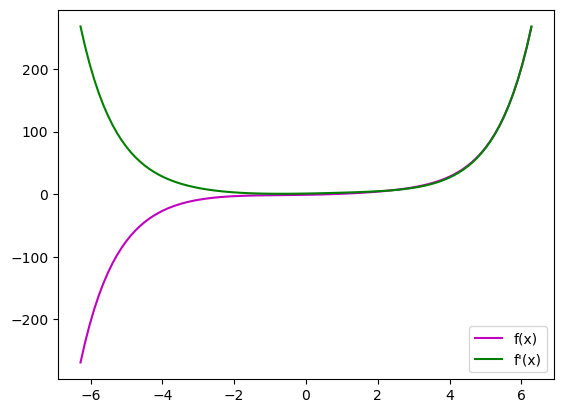

In [75]:
# Ya teniendo la funcion y los Metodos preparados, graficamos la funcion y su derivada para tener alguna idea del comportamiento 
x = np.linspace(-2*np.pi,2*np.pi,100)
plt.plot(x,f(x),label="f(x)",color = "m")
plt.plot(x,dev_f(x),label="f'(x)",color="g")
plt.legend()

In [76]:
# Ya con este grafico podemos intuir los valores de a y b correspondiente al intervalo del algoritmo del Met_Bisec
"a = -4 y b = 4"
punto_inicial = Met_Bisec(f, -3, 4, 1e-12)
punto_inicial

0.7032906588643755

In [77]:
Cero_de_la_funcion = Met_Newton(f, dev_f, punto_inicial, 1e-12)
Cero_de_la_funcion

0.7032906588639654

In [78]:
# Evaluamos si lo calculado coincide 
f(Cero_de_la_funcion)

-1.1102230246251565e-16

In [ ]:
# considerando que es un nunmero que es multiplicado por "e-16" seria extremadamente pequeño y cercano a cero asi que lo considero correcto

# Calificación: 7.0